Chargement et prétraitement des données...

Équilibrage des données avec SMOTE...
Distribution des classes avant équilibrage:
Target
0    570
1    178
Name: count, dtype: int64

Distribution des classes après équilibrage:
Target
1    570
0    570
Name: count, dtype: int64

Division des données équilibrées...
Scaler sauvegardé dans : ../data/scaler.pkl

Optimisation et entraînement du modèle XGBoost...

Évaluation du modèle optimisé...
✅ Accuracy: 0.7982456140350878
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       114
           1       0.79      0.81      0.80       114

    accuracy                           0.80       228
   macro avg       0.80      0.80      0.80       228
weighted avg       0.80      0.80      0.80       228



c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:43:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Sauvegarde du modèle optimisé...
💾 Modèle XGBoost sauvegardé dans : ../data/xgboost_model_tuned.pkl

Processus terminé avec succès!


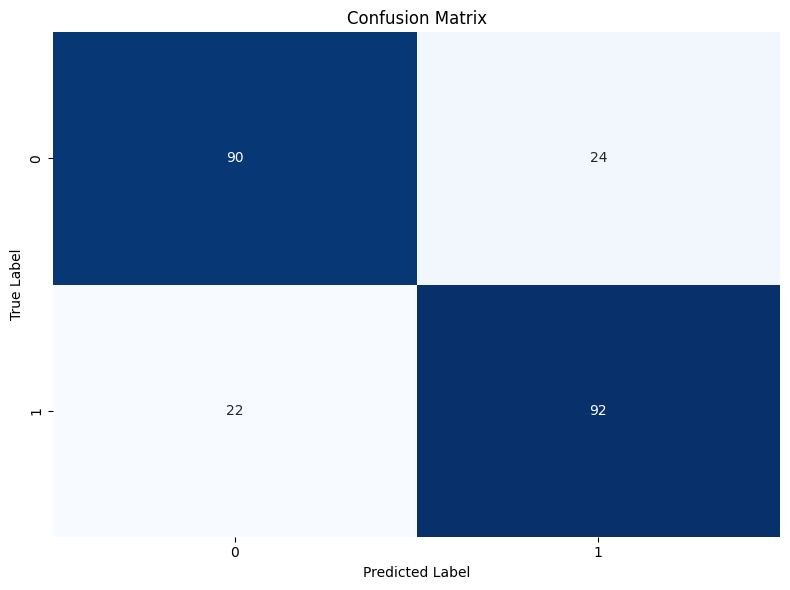

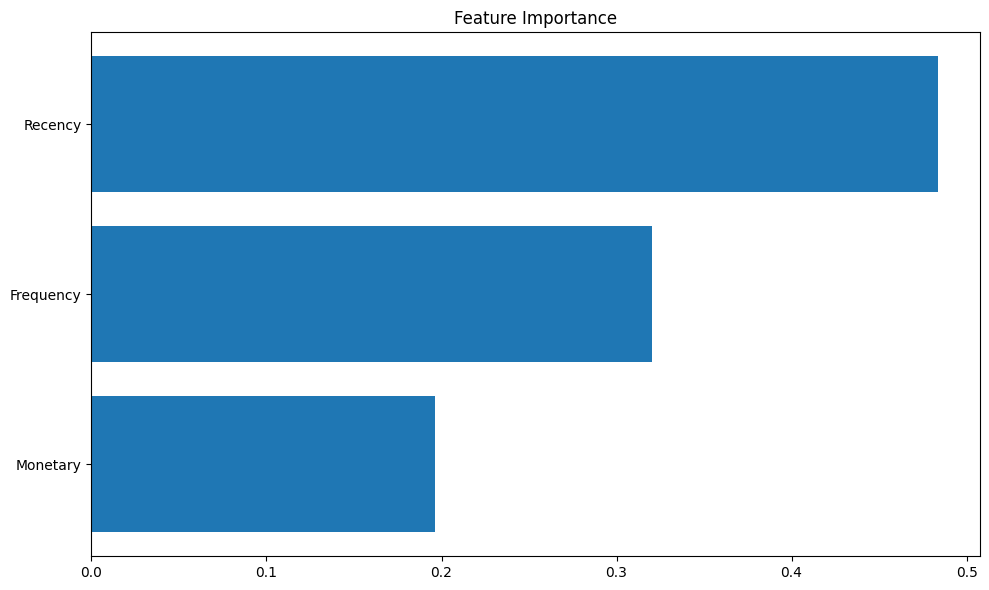

In [5]:
# train_xgboost_tuned.py
import sys
import os

from xgboost import XGBClassifier
sys.path.append(os.path.abspath('../src'))

from preprocessing.preprocess import load_data, preprocess_data, split_data, balance_data_with_smote
from utils.utils import save_scaler
from models.xgboost_model import train_xgboost, evaluate_model, save_model, tune_xgboost

# 1. Charger et prétraiter
print("Chargement et prétraitement des données...")
df = load_data("../data/transfusion.csv")
df.drop(['Monetary'],axis=1,inplace=True)
X_scaled, y, scaler = preprocess_data(df)

# 2. Équilibrer les données avec SMOTE
print("\nÉquilibrage des données avec SMOTE...")
X_balanced, y_balanced = balance_data_with_smote(X_scaled, y)

# 3. Diviser les données équilibrées
print("\nDivision des données équilibrées...")
X_train, X_test, y_train, y_test = split_data(X_balanced, y_balanced)

# 4. Sauvegarder le scaler
save_scaler(scaler, "../data/scaler.pkl")



# 5. Optimiser et entraîner le modèle avec GridSearchCV
print("\nOptimisation et entraînement du modèle XGBoost...")
# best_model = tune_xgboost(X_train, y_train, cv=5)
xgb = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

xgb.fit(X_train,y_train)

# 6. Évaluer le modèle optimisé
print("\nÉvaluation du modèle optimisé...")
evaluate_model(xgb, X_test, y_test)

# 7. Sauvegarder le modèle optimisé
print("\nSauvegarde du modèle optimisé...")
save_model(xgb, "../data/xgboost_model_tuned.pkl")

print("\nProcessus terminé avec succès!")